# Shapping


In [1]:
import os
import pandas as pd

In [2]:
# Load and preprocess the train data 
from pipelines import preprocessing_pipeline

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(data_file, index_col=0, low_memory=False)
train_data = preprocessing_pipeline.fit_transform(train_data)
train_data.head()

,day_phase,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,morning,17.2,17.533333,17.866667,18.2,18.266667,18.333333,18.4,18.266667,18.133333,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,13.4
p01_1,morning,18.2,18.266667,18.333333,18.4,18.266667,18.133333,18.0,17.766667,17.533333,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,12.8
p01_2,morning,18.4,18.266667,18.133333,18.0,17.766667,17.533333,17.3,17.366667,17.433333,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,15.5
p01_3,morning,18.0,17.766667,17.533333,17.3,17.366667,17.433333,17.5,17.433333,17.366667,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,14.8
p01_4,morning,17.3,17.366667,17.433333,17.5,17.433333,17.366667,17.3,16.933333,16.566667,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,12.7


In [3]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['bg+1:00'])
y = train_data['bg+1:00']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from pipelines import standardization_pipeline

X_train = standardization_pipeline.fit_transform(X_train)
X_test = standardization_pipeline.transform(X_test)

X_train.head()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
id,,,,,,,,,,,,,,,,,,,,,
p06_6395,1.410452,1.322415,1.232313,1.141339,1.019209,0.895991,0.772717,0.651172,0.528684,0.405765,...,-0.312019,-0.311956,-0.311559,-0.311716,-0.311288,1,0,0,0,0
p12_16289,-0.695586,-0.763363,-0.796618,-0.829370,-0.830268,-0.830271,-0.829407,-0.830330,-0.830318,-0.829683,...,-0.195449,-0.231815,-0.193961,-0.212949,-0.212123,0,0,0,0,1
p03_9567,-0.929590,-0.997595,-1.030726,-1.096585,-1.131086,-1.164386,-1.196560,-1.231338,-1.231335,-1.196979,...,-0.216887,0.052684,-0.172580,-0.172908,0.054552,1,0,0,0,0
p10_6004,-1.464457,-1.466059,-1.432053,-1.363800,-1.264783,-1.231209,-1.330070,-1.498677,-1.498680,-1.430712,...,-0.322738,-0.322641,-0.322250,-0.322393,-0.322009,0,0,1,0,0
p12_7704,1.510740,1.612417,1.511013,1.208142,0.840946,0.573013,0.405563,0.472947,0.539824,0.672888,...,-0.050742,-0.087562,-0.050974,0.347621,-0.158520,0,1,0,0,0


In [5]:
from xgboost import XGBRegressor

model_depth1 = XGBRegressor()
model_depth1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
from src.features.helpers import ShapWrapper

shp = ShapWrapper(model=model_depth1, X=X_test)

In [7]:
# Get the shap values
shp.get_shap_values()

array([[ 0.03162073,  0.00947168, -0.00137964, ...,  0.01347412,
         0.08186904,  0.08824107],
       [ 0.08566752,  0.0228451 ,  0.00127899, ..., -0.02381424,
         0.04907779,  0.00164884],
       [-0.00555037,  0.01899532,  0.01241829, ...,  0.00138041,
         0.03447082,  0.07734562],
       ...,
       [-0.00992408,  0.00209916,  0.0381049 , ...,  0.00751988,
        -0.12831339, -0.00092093],
       [ 0.01154548,  0.01640156,  0.00162341, ...,  0.01655015,
         0.06341016,  0.05640007],
       [ 0.03045192,  0.01399767,  0.00242256, ...,  0.01352993,
         0.0175327 , -0.01812759]], dtype=float32)

In [8]:
# Get the shap values in a dataframe
shp.get_shap_values_df()

,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,...,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,day_phase_evening,day_phase_late_evening,day_phase_morning,day_phase_night,day_phase_noon
0,0.031621,0.009472,-0.001380,0.000604,-0.003802,-0.000252,0.021484,-0.001468,-0.003977,-0.008898,...,0.000622,-0.017297,0.004925,-0.000237,-0.015399,-0.049606,-0.013270,0.013474,0.081869,0.088241
1,0.085668,0.022845,0.001279,0.009669,0.005277,0.017339,-0.012837,-0.003621,0.002010,-0.027858,...,0.001074,0.004268,0.057673,0.067308,0.192903,-0.042368,-0.045776,-0.023814,0.049078,0.001649
2,-0.005550,0.018995,0.012418,0.007489,-0.055738,-0.000040,0.024032,-0.002614,-0.012434,0.017690,...,0.001916,0.000239,-0.022220,-0.071344,-0.014913,-0.073406,-0.014207,0.001380,0.034471,0.077346
3,0.011369,0.005078,-0.003863,-0.006535,-0.003424,-0.036092,0.021037,0.005414,0.002373,0.016506,...,-0.010866,-0.004051,0.000022,-0.016739,-0.015839,-0.050956,-0.005359,-0.002935,0.068001,0.080748
4,0.010405,0.002491,-0.001093,0.032148,0.003890,0.005874,0.037211,-0.000251,0.002368,-0.008865,...,0.011000,-0.033264,0.041585,0.012544,0.003217,-0.038132,-0.014209,0.012783,0.153233,0.000318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,-0.049159,-0.010465,0.008046,-0.013418,0.011927,0.023810,0.010865,-0.001275,-0.002817,-0.003266,...,0.001557,0.004487,0.068481,0.072031,0.076506,-0.013544,-0.009427,0.051933,0.018362,-0.009993
44252,0.040406,0.040811,-0.002938,0.009410,0.003816,0.004193,0.006036,0.000404,-0.002844,-0.004712,...,-0.004199,-0.025167,0.031977,0.040613,0.090245,-0.040911,-0.025824,0.008221,-0.178207,-0.003873
44253,-0.009924,0.002099,0.038105,0.013282,0.006777,-0.006151,0.000581,-0.017396,0.006934,-0.014026,...,0.005865,-0.007157,0.020131,0.006240,0.018461,-0.052637,-0.035535,0.007520,-0.128313,-0.000921
44254,0.011545,0.016402,0.001623,-0.005052,0.001736,0.003408,0.008678,0.001034,-0.001718,0.005041,...,-0.001506,-0.002770,0.006153,-0.025796,-0.033944,-0.056587,-0.017909,0.016550,0.063410,0.056400


In [9]:
# Get the top features
shp.get_top_features(30)

['bg-0:00',
 'bg-0:05',
 'bg-0:10',
 'bg-0:15',
 'hr-0:00',
 'day_phase_evening',
 'insulin-0:05',
 'day_phase_night',
 'hr-0:05',
 'cals-0:00',
 'insulin-0:00',
 'bg-0:20',
 'bg-2:00',
 'insulin-0:20',
 'hr-0:10',
 'hr-0:15',
 'day_phase_late_evening',
 'insulin-0:35',
 'insulin-0:10',
 'steps-0:00',
 'insulin-0:30',
 'insulin-0:40',
 'insulin-0:25',
 'insulin-1:10',
 'insulin-0:50',
 'insulin-0:15',
 'cals-1:55',
 'cals-1:50',
 'insulin-0:45',
 'bg-0:30']

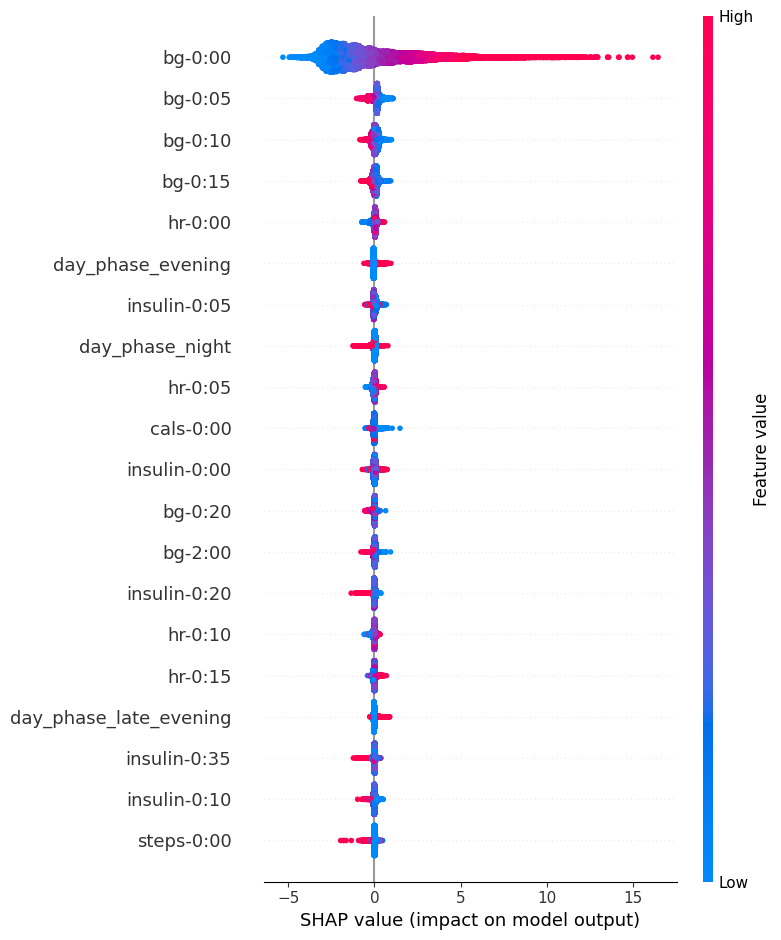

In [10]:
# Get the shap summary plot
shp.get_shap_summary_plot()

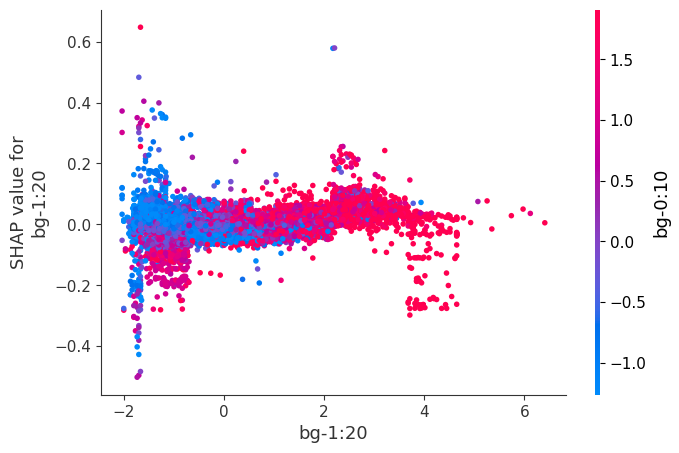

In [11]:
# Get the shap dependence plot
shp.get_shap_dependence_plot(8)

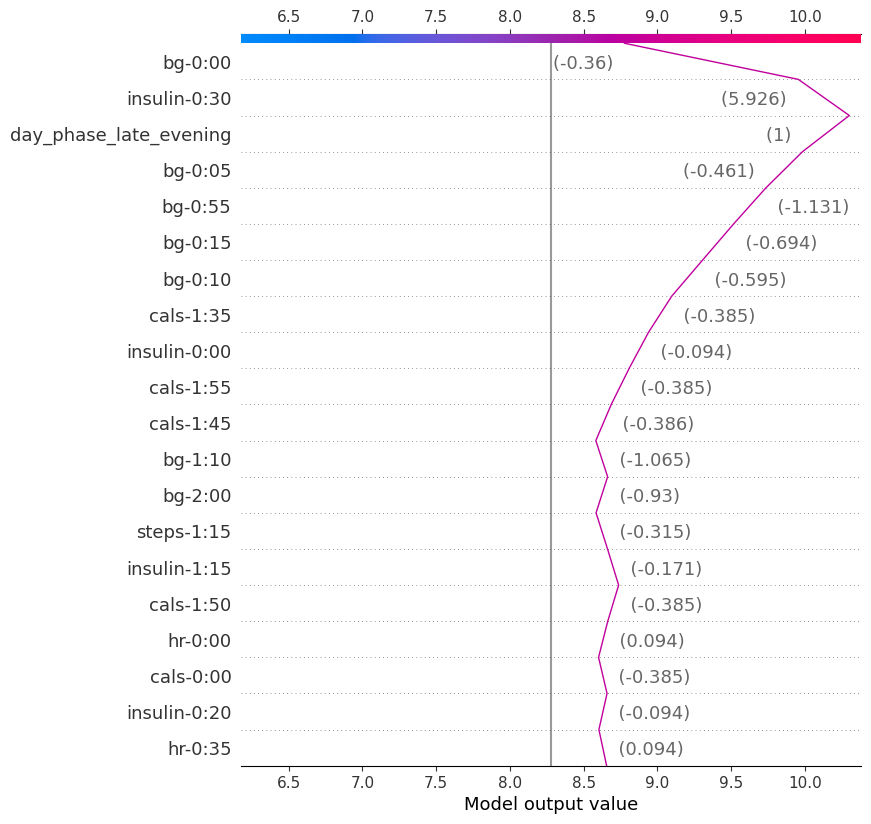

In [12]:
# Get the shap decision plot
shp.get_shap_decision_plot(8)

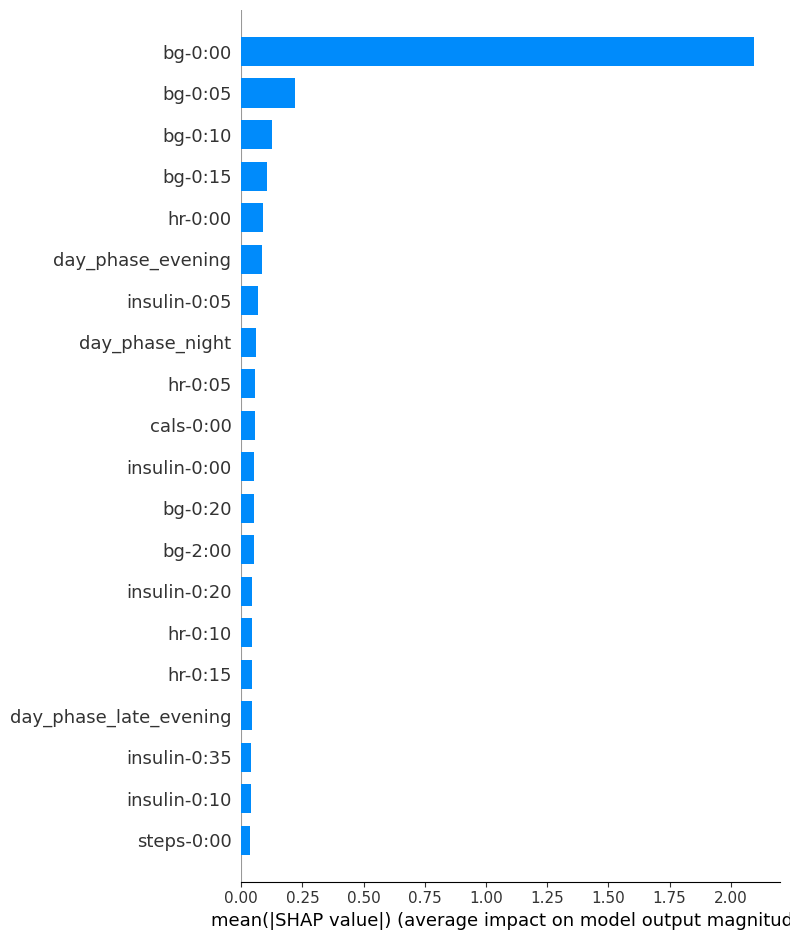

In [13]:
# Get the shap summary plot in bar
shp.get_shap_summary_plot_bar()

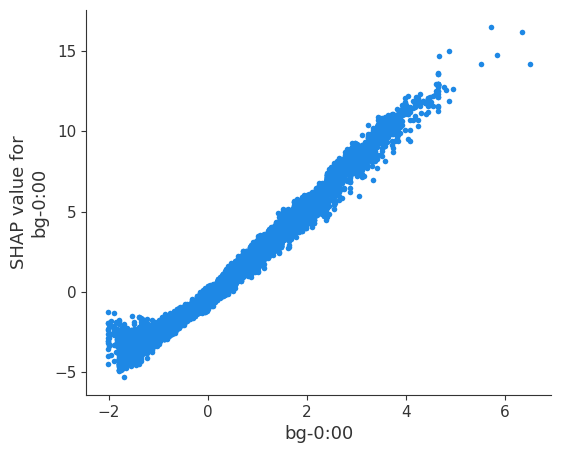

In [14]:
# Get the shap dependence plot in bar
shp.get_shap_dependence_plot_bar('bg-0:00')

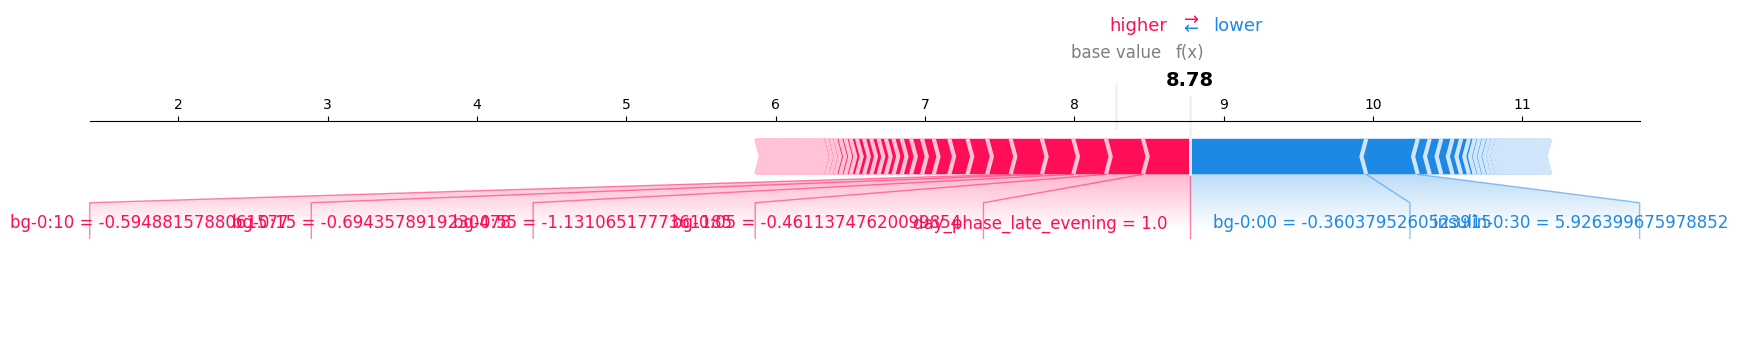

In [15]:
# Get the shap force plot in bar
shp.get_shap_force_plot_bar(8)

In [16]:
# Get the shap decision plot in bar
shp.get_shap_decision_plot_bar(8)

In [ ]:
# Get the shap interaction plot
shp.get_shap_interaction_plot('bg-0:00')

In [ ]:
# Get the shap interaction plot in bar
shp.get_shap_interaction_plot_bar('bg-0:00')